Вариант 21

In [127]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [128]:
df = pd.read_excel('./data6/Volgmed_2013.xlsx', skiprows=1)[['Пол', 'Рост, см']]

df_f = df[(df['Пол']=='жен') | (df['Пол']=='жен.')]
df_m = df[(df['Пол']=='муж') | (df['Пол']=='муж.') | (df['Пол']=='МУЖ')]

df_f_empty = df_f[(df_f['Рост, см'].isnull() != True) & (df_f['Рост, см'] != 'освобобожденная') & (df_f['Рост, см'] != 'освобождена от сдачи нормативов') & (df_f['Рост, см'] != 'спец. Группа') & (df_f['Рост, см'] != 'освобождена')]
df_m_empty = df_m[(df_m['Рост, см'].isnull() != True) & (df_m['Рост, см'] != 'освобобожденный') & (df_m['Рост, см'] != 'освобожден от сдачи нормативов') & (df_m['Рост, см'] != 'спец. Группа') & (df_m['Рост, см'] != 'спец. группа') & (df_m['Рост, см'] != 'освобожден')]

Точный тест Фишера

In [129]:
table=np.array([[len(df_f), len(df_m)], [len(df_f_empty), len(df_m_empty)]])

print(stats.fisher_exact(table).statistic)
print(stats.fisher_exact(table).pvalue)

1.122710698847643
0.06415532741573801


In [130]:
df = df[((df['Пол']=='жен') | (df['Пол']=='жен.') | (df['Пол']=='муж') | (df['Пол']=='муж.') | (df['Пол']=='МУЖ')) & (df['Рост, см'].isna() != True) & (df['Рост, см'] != 'освобобожденная') & (df['Рост, см'] != 'освобождена от сдачи нормативов') & (df['Рост, см'] != 'спец. Группа') & (df['Рост, см'] != 'освобождена') & (df['Рост, см'] != 'освобобожденный') & (df['Рост, см'] != 'освобожден от сдачи нормативов') & (df['Рост, см'] != 'спец. Группа') & (df['Рост, см'] != 'спец. группа') & (df['Рост, см'] != 'освобожден')]

data = df['Рост, см'].to_numpy()
q_025 = np.quantile(data, 0.25)
q_075 = np.quantile(data, 0.75)
iqd = q_075-q_025
upper_threshold = q_075+1.5*iqd
lower_threshold = q_025-1.5*iqd

df_clean = df.loc[(df['Рост, см'] <= upper_threshold) & (df['Рост, см'] >= lower_threshold)]

df_f_clean = df_clean[(df_clean['Пол']=='жен') | (df_clean['Пол']=='жен.')]
df_m_clean = df_clean[(df_clean['Пол']=='муж') | (df_clean['Пол']=='муж.') | (df_clean['Пол']=='МУЖ')]

data_f_clean = df_f_clean['Рост, см'].to_numpy()
data_m_clean = df_m_clean['Рост, см'].to_numpy()

t-тест Уэлча

In [131]:
print(stats.ttest_ind(list(data_f_clean), list(data_m_clean), equal_var=False).statistic)
print(stats.ttest_ind(list(data_f_clean), list(data_m_clean), equal_var=False).pvalue)
print(stats.ttest_ind(list(data_f_clean), list(data_m_clean), equal_var=False).df)

-43.31637635500278
7.28305202678669e-243
1136.7104537602074


U-тест Манна—Уитни

In [132]:
print(stats.mannwhitneyu(list(data_f_clean), list(data_m_clean)).statistic)
print(stats.mannwhitneyu(list(data_f_clean), list(data_m_clean)).pvalue)

100715.0
3.478847768786825e-215


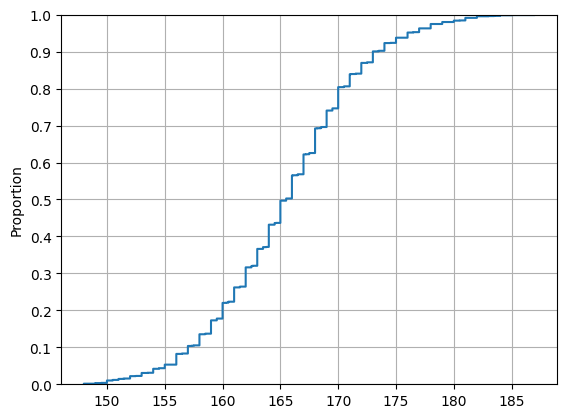

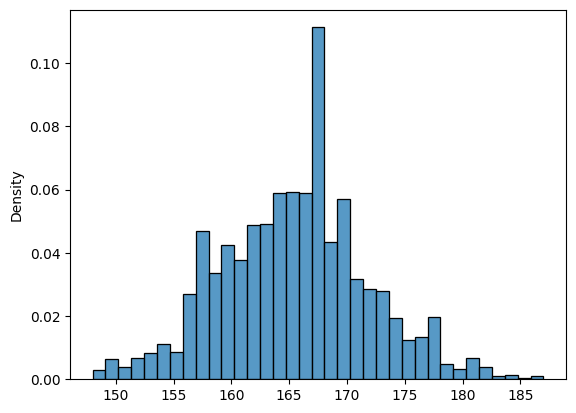

In [153]:
ax = sns.ecdfplot(data_f_clean)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.show()
sns.histplot(data_f_clean, bins=35, kde=False, stat="density")
plt.show()

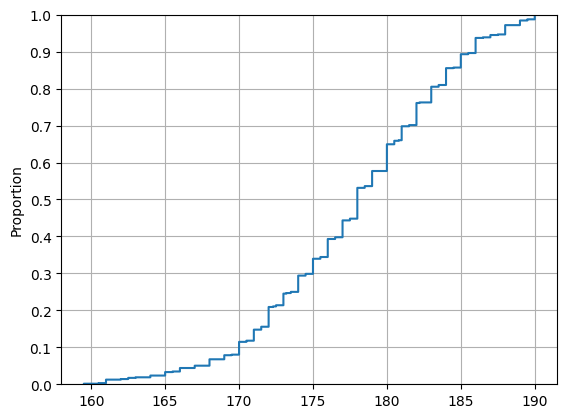

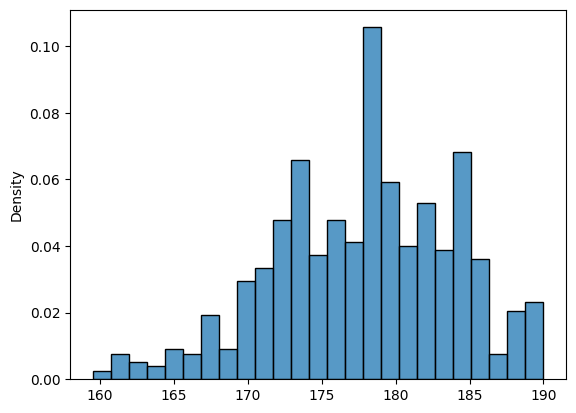

In [152]:
ax = sns.ecdfplot(data_m_clean)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.show()
sns.histplot(data_m_clean, bins=30, kde=False, stat="density")
plt.show()